In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack

(0, 1)

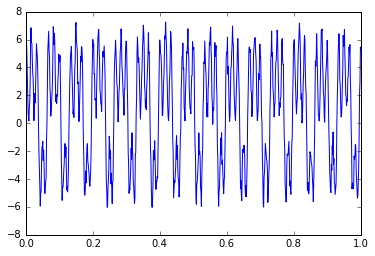

In [2]:

t_start = 0
t_stop = 4.0*np.pi

N_samples = 10000

dt = (t_stop-t_start)/N_samples

t = np.linspace(0,N_samples*dt,N_samples,endpoint=False)

fx = 4.0*np.sin(30.0*np.pi*t) + 1.5*np.cos(60.0*np.pi*t) + 3.0*np.cos(120.0*np.pi*t)
fx_noisy = fx + 2.0*np.random.rand(N_samples)

plt.plot(t,fx_noisy,'b')
plt.xlim(0,1)

/Users/bwoshea/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/bwoshea/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


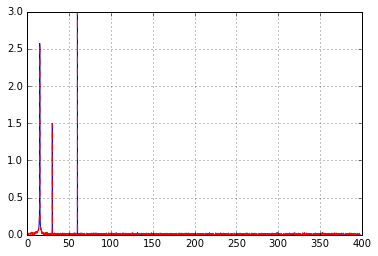

In [3]:
# get fourier transforms
yf = scipy.fftpack.fft(fx)
yf_noisy = scipy.fftpack.fft(fx_noisy)

# only plot the first half of the samples - we don't care about the rest 

xf = np.linspace(0.0,1.0/(2.0*dt), N_samples/2)

plt.plot(xf, 2.0/N_samples * np.abs(yf[0:N_samples/2]),'b-')
plt.plot(xf, 2.0/N_samples * np.abs(yf_noisy[0:N_samples/2]),'r--')

plt.grid()

397.88735773 397.88735772973837


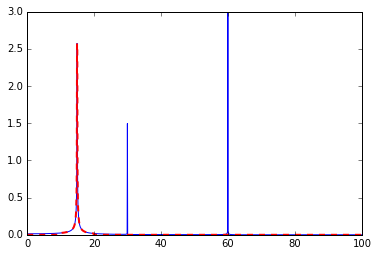

In [4]:

# now let's try this with the real-only fft (rfft)
yfr = scipy.fftpack.rfft(fx)
yfr_noisy = scipy.fftpack.rfft(fx_noisy)

xf = np.linspace(0.0, 1.0/(2.0*dt), N_samples/2)

# only plotting real component of real fft
plt.plot(xf,2.0/N_samples * np.abs(yfr[1::2]),'b-')
plt.xlim(0,100)

print(xf.max(),1e4/(8.0*np.pi))

# max frequency
xfmax = 1.0/(2.0*dt)

# delta_f per bin
dxf = xfmax/(N_samples/2.0) 

# bounds of our filter (frequency)
f_low = 10.0
f_high = 20.0

# convert to array indices.  note that the factor of 2
# is because we have 2x as many bins as we think because
# the fft keeps both real and imaginary!
N_low = 2*int(f_low/dxf)
N_high = 2*int(f_high/dxf)

yfr_copy = np.copy(yfr)
yfr_noisy_copy = np.copy(yfr_noisy)

'''
yfr_copy[0:N_low] = -N_samples
yfr_copy[N_high:] = -N_samples
plt.plot(xf,2.0/N_samples * yfr_copy[1::2],'r-')
plt.ylim(-5,5)
'''

yfr_filtered = np.copy(yfr)
yfr_filtered[0:N_low] = 0.0
yfr_filtered[N_high:] = 0.0

yfr_noisy_filtered = np.copy(yfr_noisy)
yfr_noisy_filtered[0:N_low] = 0.0
yfr_noisy_filtered[N_high:] = 0.0

plt.plot(xf,2.0/N_samples * np.abs(yfr_filtered[1::2]),'r--',linewidth=2)

# do inverse fourier transforms
fxr_filtered = scipy.fftpack.irfft(yfr_filtered)
fxr_noisy_filtered = scipy.fftpack.irfft(yfr_noisy_filtered)


In [5]:
# see how many bins are greater than zero!
print(yfr_filtered[yfr_filtered>0.0])


[  1.20852632e+02   1.22443514e+02   1.24089541e+02   1.25793472e+02
   1.27558252e+02   1.29387031e+02   1.31283184e+02   1.33250330e+02
   1.35292351e+02   1.37413424e+02   1.39618039e+02   1.41911041e+02
   1.44297655e+02   1.46783531e+02   1.49374782e+02   1.52078041e+02
   1.54900507e+02   1.57850017e+02   1.60935108e+02   1.64165107e+02
   1.67550217e+02   1.71101624e+02   1.74831621e+02   1.78753746e+02
   1.82882943e+02   1.87235752e+02   1.91830526e+02   1.96687685e+02
   2.01830018e+02   2.07283038e+02   2.13075396e+02   2.19239383e+02
   2.25811526e+02   2.32833307e+02   2.40352029e+02   2.48421880e+02
   2.57105227e+02   2.66474223e+02   2.76612802e+02   2.87619191e+02
   2.99609082e+02   3.12719694e+02   3.27115031e+02   3.42992742e+02
   3.60593227e+02   3.80211846e+02   4.02215581e+02   4.27066149e+02
   4.55352675e+02   4.87838899e+02   5.25533044e+02   5.69794157e+02
   6.22499238e+02   6.86315971e+02   7.65168080e+02   8.65073180e+02
   9.95754572e+02   1.17401276e+03

(0.5, 0.6)

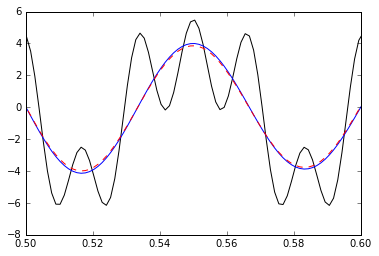

In [6]:
# plot out the filtered function.

t = np.linspace(0,N_samples*dt,N_samples,endpoint=False)

plt.plot(t,fx,'k')
plt.plot(t,fxr_filtered,'b-')
plt.plot(t,fxr_noisy_filtered,'r--')
plt.xlim(.5,.6)



In [7]:
scipy.fftpack.fft?